# Rating Professors

This project uses the Kaggle dataset "Rate My Professor Reviews 5C Colleges" ([found here](https://www.kaggle.com/datasets/tilorc/rate-my-professor-reviews-5c-colleges)) to find the overall best professor for a certain course based on various categories. Additionally, it also uses Term Frequency-Inverse Document Frequency (TF-IDF) to extract the most important keywords from the text reviews.

### Data Preprocessing

Currently in our dataset, each column is filled with string representations of dictionaries, which is not an ideal format for data analysis or machine learning. We need to preprocess this data into a structured form where each column represents a feature of the data, such as course_id, Quality, Difficulty, etc.

In [133]:
import pandas as pd
import json

In [134]:
# Load the JSON data
with open('/content/all_reviews.json') as file:
    data = json.load(file)

In [135]:
# Flatten the data into a list of dictionaries, each representing a single review
flat_data = [review for sublist in data for review in sublist]

In [136]:
# Convert the list of dictionaries into a DataFrame
reviews_df = pd.DataFrame(flat_data)

In [137]:
# Print the names of the columns
print(reviews_df.columns)

Index(['course_id', 'Quality', 'Difficulty', 'For Credit', 'Would Take Again',
       'Grade', 'Textbook', 'Comment', 'professor', 'department', 'Attendance',
       'Online Class'],
      dtype='object')


In [138]:
# Display the first few rows of the DataFrame to verify its structure
reviews_df.head()

,course_id,Quality,Difficulty,For Credit,Would Take Again,Grade,Textbook,Comment,professor,department,Attendance,Online Class
0,FHS010,5.0,2.0,Yes,Yes,A,No,Professor Nichols is super nice and very whole...,James Nichols,Government department,NaN,NaN
1,FHS010,3.0,1.0,Yes,No,NaN,No,"Very chill class and teacher, very easy grader...",James Nichols,Government department,Mandatory,NaN
2,POLPHILOSOPHY,4.0,1.0,Yes,NaN,NaN,Yes,"Awesome, easy, knows literally everything abou...",James Nichols,Government department,NaN,NaN
3,FHS010,5.0,2.0,NaN,NaN,NaN,Yes,Prof. Nichols is a super nice and encouraging ...,James Nichols,Government department,NaN,NaN
4,FHS10,5.0,1.0,NaN,NaN,NaN,Yes,Good Professor. Really nice and encouraging te...,James Nichols,Government department,NaN,NaN


In [139]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

nltk.download('popular')
nltk.download('stopwords')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [140]:
# Preprocessing Text Data
def clean_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)

In [141]:
# Handle Missing Values

# For numerical columns, convert to float and replace NaN with the column mean
numerical_cols = ['Quality', 'Difficulty']
for col in numerical_cols:
    reviews_df[col] = pd.to_numeric(reviews_df[col], errors='coerce')
    reviews_df[col].fillna(reviews_df[col].mean(), inplace=True)

# For text columns, replace NaN with a placeholder
categorical_cols = ['For Credit', 'Would Take Again', 'Textbook']
for col in categorical_cols:
    reviews_df[col].fillna('Unknown', inplace=True)

In [142]:
# Encode Categorical Data
# One-hot encoding for the 'department' column
reviews_df = pd.get_dummies(reviews_df, columns=['department'])

In [143]:
# Display the first few rows to verify changes
reviews_df.head()

,course_id,Quality,Difficulty,For Credit,Would Take Again,Grade,Textbook,Comment,professor,Attendance,...,department_Mathematics department,department_Modern Languages department,department_Philosophy department,department_Physical Education department,department_Physics department,department_Political Science department,department_Psychology department,department_Religion & Philosophy department,department_Religious Studies department,department_Speech department
0,FHS010,5.0,2.0,Yes,Yes,A,No,Professor Nichols is super nice and very whole...,James Nichols,NaN,...,False,False,False,False,False,False,False,False,False,False
1,FHS010,3.0,1.0,Yes,No,NaN,No,"Very chill class and teacher, very easy grader...",James Nichols,Mandatory,...,False,False,False,False,False,False,False,False,False,False
2,POLPHILOSOPHY,4.0,1.0,Yes,Unknown,NaN,Yes,"Awesome, easy, knows literally everything abou...",James Nichols,NaN,...,False,False,False,False,False,False,False,False,False,False
3,FHS010,5.0,2.0,Unknown,Unknown,NaN,Yes,Prof. Nichols is a super nice and encouraging ...,James Nichols,NaN,...,False,False,False,False,False,False,False,False,False,False
4,FHS10,5.0,1.0,Unknown,Unknown,NaN,Yes,Good Professor. Really nice and encouraging te...,James Nichols,NaN,...,False,False,False,False,False,False,False,False,False,False


### Feature Engineering

We will create a sentiment feature, that will categorize the overall sentiment of a professor's comments as positive, negative, or neutral based on an analysis of their text. We will also aggregate the relevant columns of our dataframe and calculate the percentage of positive, negative, and neutral comments each professor received.

In [144]:
from textblob import TextBlob

# Sentiment Analysis with TextBlob
reviews_df['sentiment'] = reviews_df['Comment'].apply(lambda comment: TextBlob(comment).sentiment.polarity)

In [145]:
# Aggregate Features
# Define the columns for which we want to calculate aggregate statistics
columns_to_aggregate = ['Quality', 'Difficulty', 'sentiment']

In [146]:
# Group by professor and aggregate with mean, median, and std
aggregated_features = reviews_df.groupby('professor')[columns_to_aggregate].agg(['mean', 'median', 'std']).reset_index()

In [147]:
# Flattening the multiindex for easier column access
aggregated_features.columns = ['_'.join(col).strip() for col in aggregated_features.columns.values]

In [148]:
# Display the aggregated features to verify
print(aggregated_features.head())

        professor_  Quality_mean  Quality_median  Quality_std  \
0   Andrew Finley       3.400000             3.5     1.646545   
1   Aaron Leconte       3.678571             4.0     1.408861   
2    Adam Bradley       4.200000             4.5     0.774597   
3      Adam Johns       5.000000             5.0     0.000000   
4  Adam Landsberg       4.750000             5.0     0.500000   

   Difficulty_mean  Difficulty_median  Difficulty_std  sentiment_mean  \
0         3.900000                4.0        0.737865        0.068249   
1         4.000000                4.0        0.679366        0.162380   
2         3.333333                3.0        1.234427        0.289987   
3         3.500000                3.5        0.707107        0.353472   
4         3.833333                4.0        0.717741        0.275664   

   sentiment_median  sentiment_std  
0          0.165278       0.327077  
1          0.199603       0.218554  
2          0.316667       0.190099  
3          0.353472   

In [149]:
print(aggregated_features.columns)

Index(['professor_', 'Quality_mean', 'Quality_median', 'Quality_std',
       'Difficulty_mean', 'Difficulty_median', 'Difficulty_std',
       'sentiment_mean', 'sentiment_median', 'sentiment_std'],
      dtype='object')


In [150]:
# Categorizing 'sentiment'

def sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiment
reviews_df['sentiment_category'] = reviews_df['sentiment'].apply(sentiment_category)

# Calculate the percentage of each sentiment category per professor
sentiment_distribution = reviews_df.groupby('professor')['sentiment_category'].value_counts(normalize=True).unstack().fillna(0)

# Multiply by 100 for percentage representation and reset index for readability
sentiment_distribution = (sentiment_distribution * 100).reset_index()

# Display the sentiment distribution for each professor
print(sentiment_distribution)


sentiment_category         professor   Negative    Neutral    Positive
0                     Andrew Finley   30.000000   0.000000   70.000000
1                     Aaron Leconte   14.285714   0.000000   85.714286
2                      Adam Bradley    6.666667   6.666667   86.666667
3                        Adam Johns    0.000000   0.000000  100.000000
4                    Adam Landsberg    0.000000   8.333333   91.666667
..                               ...        ...        ...         ...
282                     Yaron Raviv   38.709677   0.000000   61.290323
283                        Yong Kim    0.000000   0.000000  100.000000
284                 Yosef Bonaparte    0.000000   0.000000  100.000000
285                 Zachary Courser   21.428571  14.285714   64.285714
286                  shane Bjornlie    5.000000   0.000000   95.000000

[287 rows x 4 columns]


### Data Visualization

In [151]:
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

# make plots appear in the notebook
%matplotlib inline

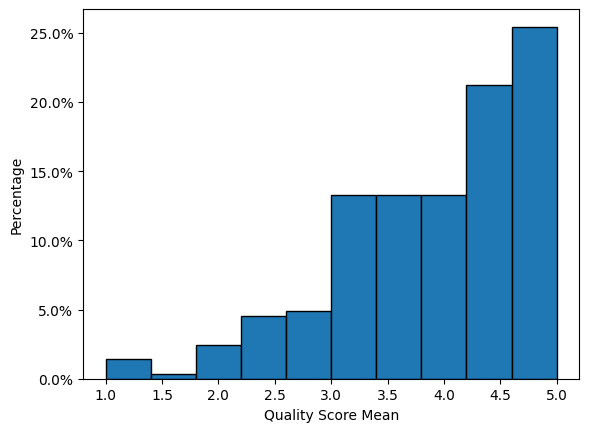

In [152]:
# Percentage of each quality score

plt.hist(aggregated_features['Quality_mean'], weights=np.ones(len(aggregated_features)) / len(aggregated_features), edgecolor='black')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Quality Score Mean')
plt.ylabel('Percentage')

plt.show()

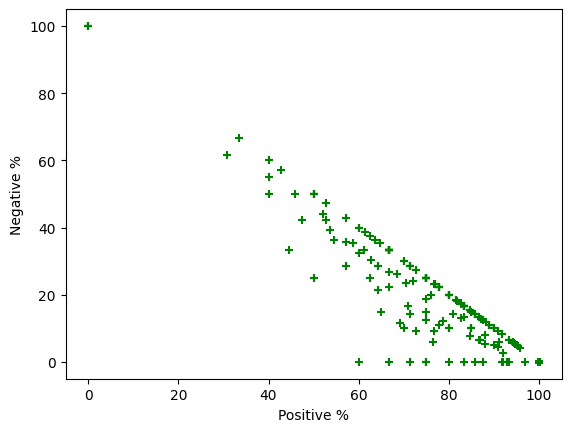

In [153]:
# Positive vs. negative comments scatter plot

plt.xlabel('Positive %')
plt.ylabel('Negative %')
plt.scatter(sentiment_distribution['Positive'], sentiment_distribution['Negative'], color='green', marker='+')

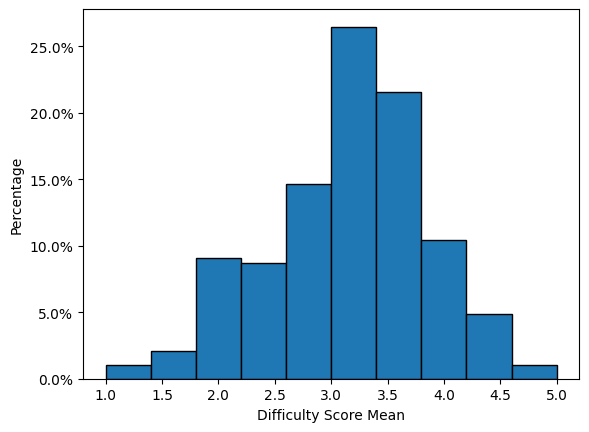

In [154]:
# Percentage of each difficulty score

plt.hist(aggregated_features['Difficulty_mean'], weights=np.ones(len(aggregated_features)) / len(aggregated_features), edgecolor='black')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Difficulty Score Mean')
plt.ylabel('Percentage')

plt.show()

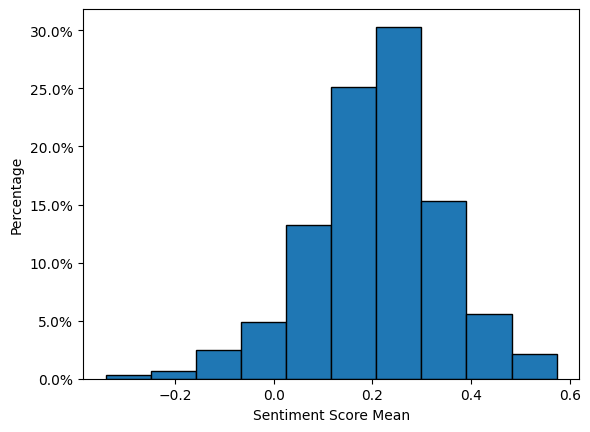

In [155]:
# Percentage of each sentiment score

plt.hist(aggregated_features['sentiment_mean'], weights=np.ones(len(aggregated_features)) / len(aggregated_features), edgecolor='black')

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.xlabel('Sentiment Score Mean')
plt.ylabel('Percentage')

plt.show()

### Rank Professors By Inputted Category

In [156]:
import pandas as pd
import numpy as np
from textblob import TextBlob

In [157]:
# Ensuring numeric columns are of a numeric dtype
reviews_df['Quality'] = pd.to_numeric(reviews_df['Quality'], errors='coerce')
reviews_df['Difficulty'] = pd.to_numeric(reviews_df['Difficulty'], errors='coerce')
reviews_df['Would Take Again'] = pd.to_numeric(reviews_df['Would Take Again'], errors='coerce')
reviews_df['sentiment'] = pd.to_numeric(reviews_df['sentiment'], errors='coerce')

In [158]:
# Converting 'Would Take Again' to a numerical format for aggregation
reviews_df['Would Take Again'] = reviews_df['Would Take Again'].replace({'Yes': 1, 'No': 0})

# Converting 'Grade' to a numerical format for aggregation
grade_mapping = {
    'A+': 4.3, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'F': 0,
    'Drop/Withdrawal': np.nan,
    'Incomplete': np.nan,
    'Not sure yet': np.nan,
    'Not_Sure_Yet': np.nan,
    'Rather not say': np.nan,
    'Rather_Not_Say': np.nan,
    'Unknown': np.nan
}

# Applying the mapping to the 'Grade' column
reviews_df['Grade_Numerical'] = reviews_df['Grade'].map(grade_mapping)

In [159]:
# Filling NaN values
reviews_df['Grade_Numerical'].fillna(reviews_df['Grade_Numerical'].mean(), inplace=True)
reviews_df['Quality'].fillna(reviews_df['Quality'].mean(), inplace=True)
reviews_df['Difficulty'].fillna(reviews_df['Difficulty'].mean(), inplace=True)
reviews_df['Would Take Again'].fillna(0, inplace=True)
reviews_df['sentiment'].fillna(0, inplace=True) # Neutral sentiment if missing

In [160]:
# Aggregating features by professor, also considering course if we need to filter by it later
aggregated_features = reviews_df.groupby(['professor', 'course_id']).agg({
    'Quality': 'mean',
    'Difficulty': 'mean',
    'Would Take Again': 'mean',
    'sentiment': 'mean',
    'Grade_Numerical': 'mean'
}).reset_index()

In [161]:
# Function to get the best professor for the course
def get_best_professor(department=None, course_id=None, df=aggregated_features):
    if course_id:
        df = df[df['course_id'] == course_id]

    if df.empty:
        # If no matches found, return a message indicating this
        return f"No data found for the given criteria."

    # Calculating the composite score
    df['composite_score'] = (df['Quality'] * 2 + df['Would Take Again'] * 1.5 +
                             df['sentiment'] * 1 - df['Difficulty'] * 2 +
                             df['Grade_Numerical'] * 1)

    # Getting the best professor based on the highest composite score
    best_professor = df.sort_values(by='composite_score', ascending=False).iloc[0]

    return best_professor[['professor']]

In [162]:
# Example
best_prof_for_course = get_best_professor(course_id=' FHS01')

print("Best Professor for Course:", best_prof_for_course)

Best Professor for Course: professor    Amy Kind 
Name: 60, dtype: object


<ipython-input-161-00c1976454f5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['composite_score'] = (df['Quality'] * 2 + df['Would Take Again'] * 1.5 +


### Find Key Words In Reviews

We can create a function that can extract key themes or keywords from the comments associated with a given professor. We can use a NLP technique called Term Frequency-Inverse Document Frequency (TF-IDF) to find important words in the comments.

In [163]:
# Import TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [164]:
# Fix professor names
reviews_df['professor'] = reviews_df['professor'].str.strip().str.lower()

In [165]:
def preprocess_text(text):
    text = text.lower()
    # Replace punctuation with space
    text = ''.join([char if char.isalnum() or char.isspace() else ' ' for char in text])
    return text

# Preprocess comment column
reviews_df['cleaned_comments'] = reviews_df['Comment'].apply(preprocess_text)

In [166]:
# Misspelled words and words to avoid
extended_stop_words = list(set(stopwords.words('english')) | {'ive', 'youll', 'alot', 'isnt', 'doesnt', 'wasnt',
                                                              'makes', 'really', 'extremely', 'very', 'teaches',
                                                              'often', 'would', 'little', 'took', 'students', 'might',
                                                              'go', 'give', 'try', 'already', 'says', 'whole', 'think',
                                                              'times', 'taken', 'expect', 'come', 'catch', 'life',
                                                              'also', 'must', 'class', 'classes', 'much', 'making',
                                                              'prof', 'professor', 'us', 'person', 'guy', 'wants',
                                                              'style', 'last', 'every', 'say', 'grader', 'make',
                                                              'always', 'im', 'anyone', 'term', 'looking', 'however',
                                                              'student', 'definitely', 'pretty', 'call', 'though', 'takes',
                                                              'one', 'many', 'material', 'things', 'thing', 'know', 'feel',
                                                              'subject', 'teacher', 'office', 'way', 'rather', 'load',
                                                              'overall', '10', '50', '20', 'comes', 'tends', 'need',
                                                              'assigned', 'stands', 'else', 'bring', 'school', 'actual',
                                                              'designed', 'since', 'even', 'shows', 'could', 'want',
                                                              'course', 'truly', 'first', 'taking', 'hours', 'although'
                                                              })

In [167]:
# Relevant words to look for
relevant_words = ['funny', 'bad', 'good', 'harsh', 'boring', 'easy', 'test', 'exam', 'hard',
                  'fun', 'great', 'unclear', 'lectures', 'avoid', 'take', 'interesting', 'passionate',
                  'kind', 'smart', 'experience', 'homework', 'project', 'projects', 'exams', 'mean',
                  'curve', 'knowledgeable', 'loved', 'time', 'cares', 'paper', 'papers', 'writing',
                  'lab', 'labs', 'impossible', 'wise', 'anecdotes', 'easier', 'harder', 'intimidating',
                  'friendly', 'terrible', 'amazing', 'difficult', 'help', 'struggle', 'struggling',
                  'best', 'worst', 'textbook', 'reputation', 'attention', 'willing', 'possible',
                  'confusing', 'brilliant', 'amazing', 'succeed', 'discussions', 'discussion', 'loves',
                  'serious', 'clear', 'organized', 'disorganized', 'great', 'recommend', 'different',
                  'debate', 'debates', 'write', 'sweet', 'essay', 'essays', 'reading', 'read', 'book',
                  'participate', 'helpful', 'awesome', 'nice', 'readings', 'final', 'quiz', 'quizzes',
                  'respect', 'open', 'lecturer', 'excellent', 'scholar', 'approachable', 'confused',
                  'confusing', 'tangents', 'tangent', 'ok', 'okay', 'accent', 'funniest', 'hardest',
                  'cute', 'jokes', 'tough', 'enjoyable', 'idiot', 'waste', 'entertaining', 'elective',
                  'weird', 'project', 'projects', 'presentation', 'ridiculous', 'fair', 'unfair', 'dry',
                  'handwriting', 'stupid', 'horrible', 'decent']

In [168]:
def get_top_keywords(professor, reviews_df, top_n=5, boost_factor=1.5):
    # Get reviews for the selected professor
    professor = professor.strip().lower()
    prof_comments = reviews_df[reviews_df['professor'] == professor]['cleaned_comments']

    if prof_comments.empty:
        return "No comments available for this professor."

    # Create the tfidf with stop words list
    tfidf = TfidfVectorizer(stop_words=extended_stop_words, max_df=0.5, min_df=2)
    tfidf_matrix = tfidf.fit_transform(prof_comments)

    # Boost scores for relevant words
    feature_names = np.array(tfidf.get_feature_names_out())
    for word in relevant_words:
        if word in feature_names:
            index = list(feature_names).index(word)
            tfidf_matrix[:, index] *= boost_factor

    # Sum tfidf scores for each term across all documents
    sum_tfidf = tfidf_matrix.sum(axis=0)
    sorted_indices = np.argsort(sum_tfidf).flatten()[::-1]

    # Extract top n keywords with highest sum tfidf scores
    top_keywords = feature_names[sorted_indices][:top_n]

    return top_keywords.tolist()

In [169]:
# Example
professor_name = best_prof_for_course.iloc[0]
keywords = get_top_keywords(professor_name, reviews_df, boost_factor=2)
print(keywords)

[['meaning', 'death', 'fhs', 'expectations', 'like', 'topic', 'enjoyed', 'grades', 'teaching', 'work', 'decently', 'outside', 'thought', 'topics', 'accessible', 'get', 'annoying', 'essays', 'well', 'clear', 'wonderful', 'reading', 'readings', 'lot', 'writing', 'lectures', 'time', 'hard', 'logic', 'help', 'good', 'helpful', 'funny', 'made', 'discussions', 'philosophy', 'amazing', 'recommend', 'easy', 'paper', 'take', 'discussion', 'homework', 'papers', 'interesting', 'difficult', 'kind', 'great']]
